In [19]:
import os
import glob
import numpy as np
from pint.models import get_model
import pint.logging
from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy import constants as const
import matplotlib.pyplot as plt

pint.logging.setup(level="WARNING")

2

In [2]:
def deg_GBT(sep,cfreq,diam=100.0 * u.m):
    """ Calculate degradation given angular separation, center frequency
    
    This calculation assumes the beam's sensitivity pattern is well-approximated by a
    Gaussian function. The default diameter is for the GBT and the beam's full width at
    half max is calculated using FWHM = 1.2*lamda/eff_diam rad.
    
    Parameters
    ==========
    sep: quantity, separation between observed/actual positions (arcmin)
    cfreq: quantity, center frequency of observation (MHz)
    diam: optional quantity, effective diameter of telescope (meters)
    
    Returns
    =======
    deg: float, estimated degradation to sensitivity based on separation
    """
    lamda = const.c/cfreq
    fwhm = 1.2*(lamda/diam*u.rad).to(u.arcmin)
    sig = fwhm/2.35482 # (solve for sigma when amplitude is 1/2; see wiki)
    
    return np.exp(-(sep/sig)**2/2)

In [3]:
def deg_AO(sep,cfreq,diam=300.0 * u.m):
    """ Calculate degradation given angular separation, center frequency
    
    This calculation assumes the beam's sensitivity pattern is well-approximated by a
    Gaussian function. The default diameter is for AO and the beam's full width at
    half max is calculated using FWHM = 1.2*lamda/eff_diam rad.
    
    Parameters
    ==========
    sep: quantity, separation between observed/actual positions (arcmin)
    cfreq: quantity, center frequency of observation (MHz)
    diam: optional quantity, effective diameter of telescope (meters)
    
    Returns
    =======
    deg: float, estimated degradation to sensitivity based on separation
    """
    lamda = const.c/cfreq
    fwhm = 1.2*(lamda/diam*u.rad).to(u.arcmin)
    sig = fwhm/2.35482 # (solve for sigma when amplitude is 1/2; see wiki)
    
    return np.exp(-(sep/sig)**2/2)

In [4]:
def deg_LOFAR(sep,fwhm=5 * u.arcmin):
    """ Calculate degradation given angular separation
    
    This calculation assumes the beam's sensitivity pattern is well-approximated by a
    Gaussian function. 
    
    The default FWHM is 5 arcmin: https://www.astron.nl/lofarscience2013/presentations/Session2_hessels.pdf page 8
    
    Parameters
    ==========
    sep: quantity, separation between observed/actual positions (arcmin)
    fwhm: optional quantity, full-width half-maximum of the telescope beam (arcmin)
    
    Returns
    =======
    deg: float, estimated degradation to sensitivity based on separation
    """
    sig = fwhm.to(u.arcmin)/2.35482 # (solve for sigma when amplitude is 1/2; see wiki)
    
    return np.exp(-(sep/sig)**2/2)

In [5]:
def deg_LWA1(sep,fwhm=2 * u.deg):
    """ Calculate degradation given angular separation
    
    This calculation assumes the beam's sensitivity pattern is well-approximated by a
    Gaussian function. 
    
    The default FWHM is 2 degrees, the value for the very top of the usable LWA1 band 
    around 80 MHz (Taylor et al. 2012)
    
    Parameters
    ==========
    sep: quantity, separation between observed/actual positions (arcmin)
    fwhm: optional quantity, full-width half-maximum of the telescope beam (degrees)
    
    Returns
    =======
    deg: float, estimated degradation to sensitivity based on separation
    """
    sig = fwhm.to(u.arcmin)/2.35482 # (solve for sigma when amplitude is 1/2; see wiki)
    
    return np.exp(-(sep/sig)**2/2)

In [6]:
MHz = 1.0e6*u.Hz
pars = np.sort(glob.glob("*[0-9]_fiore+22.par"))

In [21]:
print(deg_GBT(sep=7*u.arcmin,cfreq=350*MHz))

0.8969014572427696


PSR J0032+6946 was observed 81 times


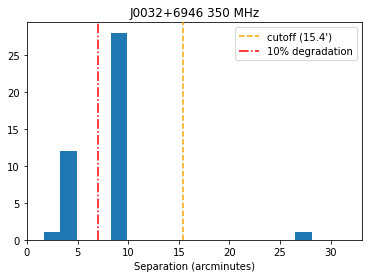

  41 time(s) at 350 MHz within 15.4 arcmin of the timing position (42 total)
  Min separation at 350 MHz: 3.3 arcmin (deg = 0.98)
  Med separation at 350 MHz: 8.4 arcmin (deg = 0.85)
  Max separation at 350 MHz: 26.7 arcmin (deg = 0.21)
  Max separation at 350 MHz: 26.7 arcmin (deg = 0.21)
  Degradation factor at 350 MHz: 0.89


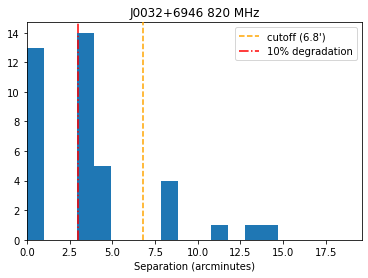

  32 time(s) at 820 MHz within 6.8 arcmin of the timing position (39 total)
  Min separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 820 MHz: 3.8 arcmin (deg = 0.84)
  Max separation at 820 MHz: 14.5 arcmin (deg = 0.08)
  Max separation at 820 MHz: 14.5 arcmin (deg = 0.08)
  Degradation factor at 820 MHz: 0.89
PSR J0141+6303 was observed 37 times


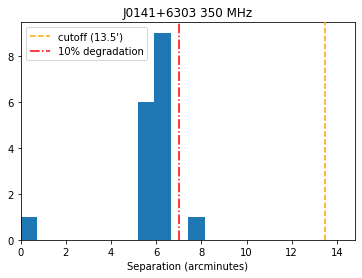

  17 time(s) at 350 MHz within 13.5 arcmin of the timing position (17 total)
  Min separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 350 MHz: 6.5 arcmin (deg = 0.91)
  Max separation at 350 MHz: 7.9 arcmin (deg = 0.87)
  Max separation at 350 MHz: 7.9 arcmin (deg = 0.87)
  Degradation factor at 350 MHz: 0.92


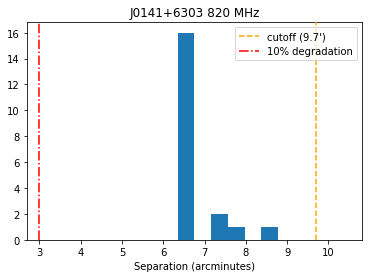

  20 time(s) at 820 MHz within 9.7 arcmin of the timing position (20 total)
  Min separation at 820 MHz: 6.5 arcmin (deg = 0.60)
  Med separation at 820 MHz: 6.7 arcmin (deg = 0.58)
  Max separation at 820 MHz: 8.4 arcmin (deg = 0.42)
  Max separation at 820 MHz: 8.4 arcmin (deg = 0.42)
  Degradation factor at 820 MHz: 0.57
PSR J0214+5222 was observed 52 times


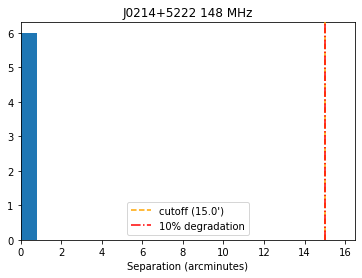

  6 time(s) at 149 MHz within 15.0 arcmin of the timing position (6 total)
  Min separation at 149 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 149 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 149 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 149 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 149 MHz: 1.00


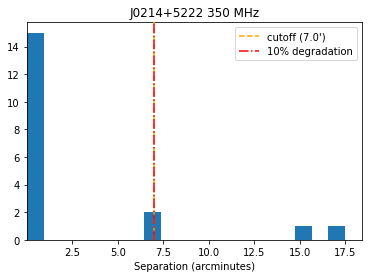

  15 time(s) at 350 MHz within 7.0 arcmin of the timing position (19 total)
  Min separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 350 MHz: 16.7 arcmin (deg = 0.54)
  Max separation at 350 MHz: 16.7 arcmin (deg = 0.54)
  Degradation factor at 350 MHz: 1.00


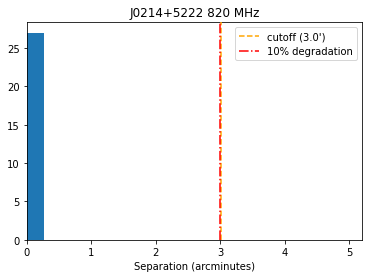

  27 time(s) at 820 MHz within 3.0 arcmin of the timing position (27 total)
  Min separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 820 MHz: 1.00
PSR J0415+6111 was observed 20 times
  1 time(s) at 350 MHz within 11.0 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 10.9 arcmin (deg = 0.77)
  Med separation at 350 MHz: 10.9 arcmin (deg = 0.77)
  Max separation at 350 MHz: 10.9 arcmin (deg = 0.77)
  Max separation at 350 MHz: 10.9 arcmin (deg = 0.77)
  Degradation factor at 350 MHz: 0.77


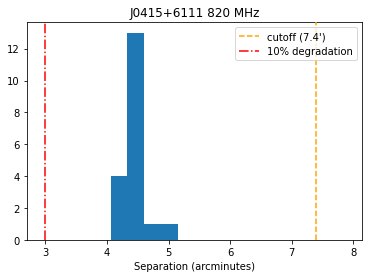

  19 time(s) at 820 MHz within 7.4 arcmin of the timing position (19 total)
  Min separation at 820 MHz: 4.2 arcmin (deg = 0.81)
  Med separation at 820 MHz: 4.4 arcmin (deg = 0.79)
  Max separation at 820 MHz: 4.9 arcmin (deg = 0.75)
  Max separation at 820 MHz: 4.9 arcmin (deg = 0.75)
  Degradation factor at 820 MHz: 0.79
PSR J0636+5128 was observed 83 times


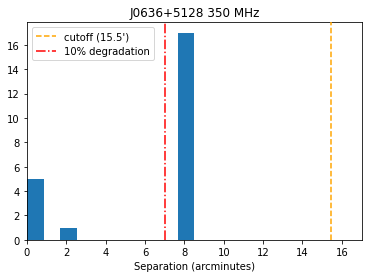

  23 time(s) at 350 MHz within 15.5 arcmin of the timing position (23 total)
  Min separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 350 MHz: 8.5 arcmin (deg = 0.85)
  Max separation at 350 MHz: 8.5 arcmin (deg = 0.85)
  Max separation at 350 MHz: 8.5 arcmin (deg = 0.85)
  Degradation factor at 350 MHz: 0.90


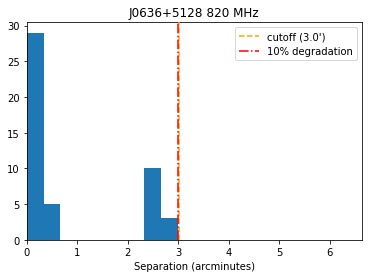

  47 time(s) at 820 MHz within 3.0 arcmin of the timing position (47 total)
  Min separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 820 MHz: 2.8 arcmin (deg = 0.91)
  Max separation at 820 MHz: 2.8 arcmin (deg = 0.91)
  Degradation factor at 820 MHz: 0.98


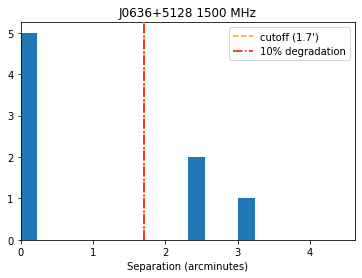

  5 time(s) at 1500 MHz within 1.7 arcmin of the timing position (8 total)
  Min separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1500 MHz: 3.2 arcmin (deg = 0.66)
  Max separation at 1500 MHz: 3.2 arcmin (deg = 0.66)
  Degradation factor at 1500 MHz: 1.00


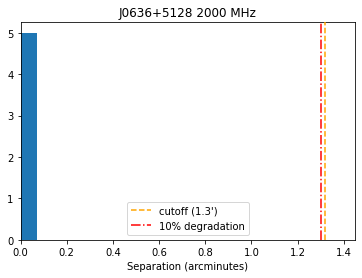

  5 time(s) at 2000 MHz within 1.3 arcmin of the timing position (5 total)
  Min separation at 2000 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 2000 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 2000 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 2000 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 2000 MHz: 1.00
PSR J0957-0619 was observed 19 times
  1 time(s) at 350 MHz within 2.4 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 2.3 arcmin (deg = 0.99)
  Med separation at 350 MHz: 2.3 arcmin (deg = 0.99)
  Max separation at 350 MHz: 2.3 arcmin (deg = 0.99)
  Max separation at 350 MHz: 2.3 arcmin (deg = 0.99)
  Degradation factor at 350 MHz: 0.99


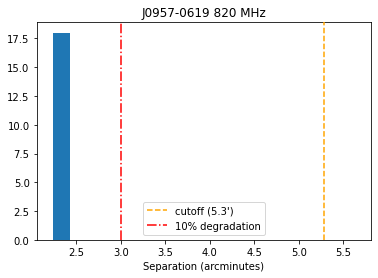

  18 time(s) at 820 MHz within 5.3 arcmin of the timing position (18 total)
  Min separation at 820 MHz: 2.3 arcmin (deg = 0.94)
  Med separation at 820 MHz: 2.3 arcmin (deg = 0.94)
  Max separation at 820 MHz: 2.3 arcmin (deg = 0.94)
  Max separation at 820 MHz: 2.3 arcmin (deg = 0.94)
  Degradation factor at 820 MHz: 0.94
PSR J1239+3239 was observed 50 times


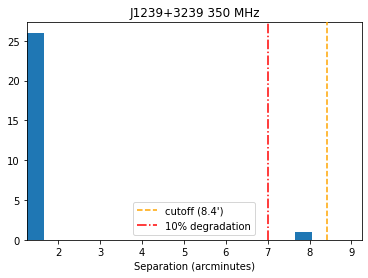

  27 time(s) at 350 MHz within 8.4 arcmin of the timing position (27 total)
  Min separation at 350 MHz: 1.4 arcmin (deg = 1.00)
  Med separation at 350 MHz: 1.4 arcmin (deg = 1.00)
  Max separation at 350 MHz: 7.8 arcmin (deg = 0.87)
  Max separation at 350 MHz: 7.8 arcmin (deg = 0.87)
  Degradation factor at 350 MHz: 0.99


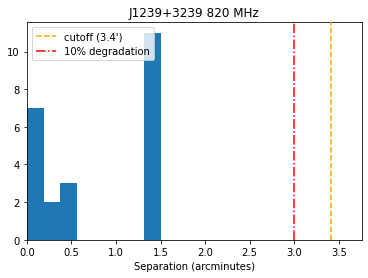

  23 time(s) at 820 MHz within 3.4 arcmin of the timing position (23 total)
  Min separation at 820 MHz: 0.1 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.4 arcmin (deg = 1.00)
  Max separation at 820 MHz: 1.4 arcmin (deg = 0.98)
  Max separation at 820 MHz: 1.4 arcmin (deg = 0.98)
  Degradation factor at 820 MHz: 0.99
PSR J1327+3423 was observed 121 times


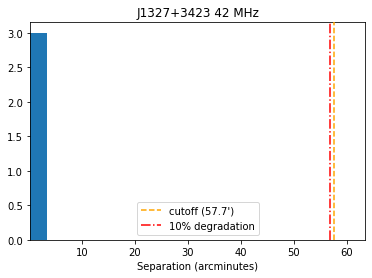

  3 time(s) at 42 MHz within 57.7 arcmin of the timing position (3 total)
  Min separation at 42 MHz: 0.9 arcmin (deg = 1.00)
  Med separation at 42 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 42 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 42 MHz: 0.9 arcmin (deg = 1.00)
  Degradation factor at 42 MHz: 1.00


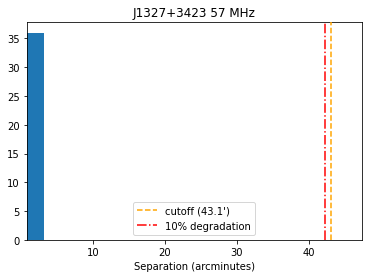

  36 time(s) at 57 MHz within 43.1 arcmin of the timing position (36 total)
  Min separation at 57 MHz: 0.9 arcmin (deg = 1.00)
  Med separation at 57 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 57 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 57 MHz: 0.9 arcmin (deg = 1.00)
  Degradation factor at 57 MHz: 1.00


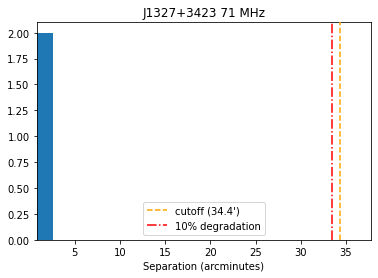

  2 time(s) at 72 MHz within 34.4 arcmin of the timing position (2 total)
  Min separation at 72 MHz: 0.9 arcmin (deg = 1.00)
  Med separation at 72 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 72 MHz: 0.9 arcmin (deg = 1.00)
  Max separation at 72 MHz: 0.9 arcmin (deg = 1.00)
  Degradation factor at 72 MHz: 1.00


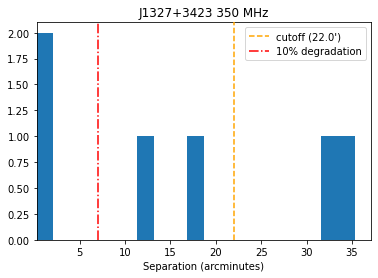

  4 time(s) at 350 MHz within 22.0 arcmin of the timing position (6 total)
  Min separation at 350 MHz: 0.3 arcmin (deg = 1.00)
  Med separation at 350 MHz: 15.0 arcmin (deg = 0.61)
  Max separation at 350 MHz: 33.8 arcmin (deg = 0.08)
  Max separation at 350 MHz: 33.8 arcmin (deg = 0.08)
  Degradation factor at 350 MHz: 0.88


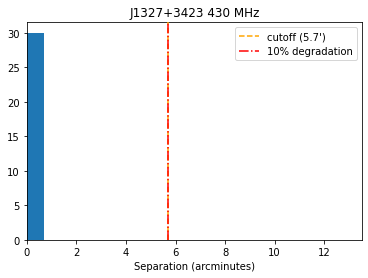

  30 time(s) at 430 MHz within 5.7 arcmin of the timing position (30 total)
  Min separation at 430 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 430 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 430 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 430 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 430 MHz: 1.00


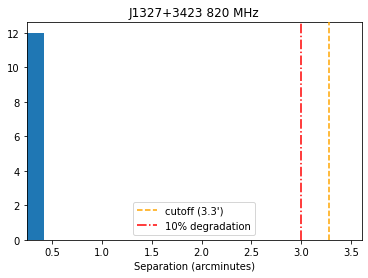

  12 time(s) at 820 MHz within 3.3 arcmin of the timing position (12 total)
  Min separation at 820 MHz: 0.3 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.3 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.3 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.3 arcmin (deg = 1.00)
  Degradation factor at 820 MHz: 1.00


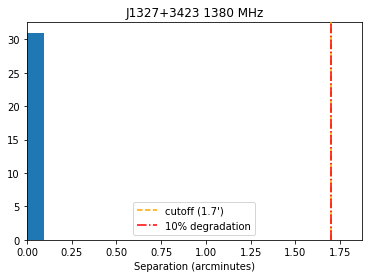

  31 time(s) at 1380 MHz within 1.7 arcmin of the timing position (31 total)
  Min separation at 1380 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 1380 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1380 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1380 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 1380 MHz: 1.00
  1 time(s) at 1430 MHz within 0.1 arcmin of the timing position (1 total)
  Min separation at 1430 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 1430 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1430 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1430 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 1430 MHz: 1.00
PSR J1434+7257 was observed 82 times


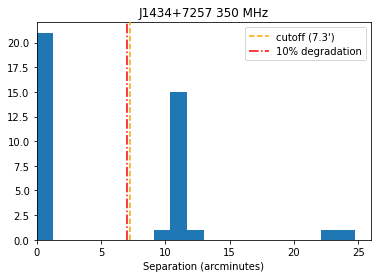

  21 time(s) at 350 MHz within 7.3 arcmin of the timing position (40 total)
  Min separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 350 MHz: 0.3 arcmin (deg = 1.00)
  Max separation at 350 MHz: 23.7 arcmin (deg = 0.29)
  Max separation at 350 MHz: 23.7 arcmin (deg = 0.29)
  Degradation factor at 350 MHz: 1.00


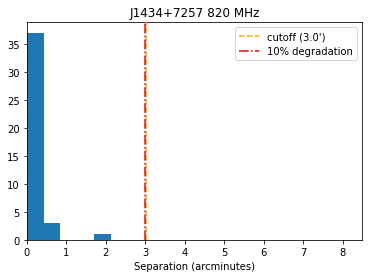

  41 time(s) at 820 MHz within 3.0 arcmin of the timing position (41 total)
  Min separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 820 MHz: 1.8 arcmin (deg = 0.96)
  Max separation at 820 MHz: 1.8 arcmin (deg = 0.96)
  Degradation factor at 820 MHz: 1.00
  1 time(s) at 1500 MHz within 0.1 arcmin of the timing position (1 total)
  Min separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 1500 MHz: 1.00
PSR J1505-2524 was observed 26 times


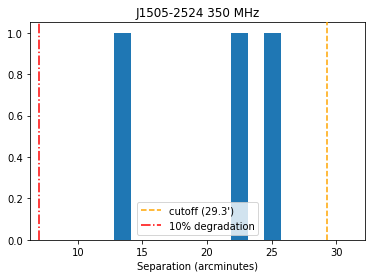

  3 time(s) at 350 MHz within 29.3 arcmin of the timing position (3 total)
  Min separation at 350 MHz: 12.9 arcmin (deg = 0.69)
  Med separation at 350 MHz: 22.3 arcmin (deg = 0.33)
  Max separation at 350 MHz: 24.6 arcmin (deg = 0.26)
  Max separation at 350 MHz: 24.6 arcmin (deg = 0.26)
  Degradation factor at 350 MHz: 0.43


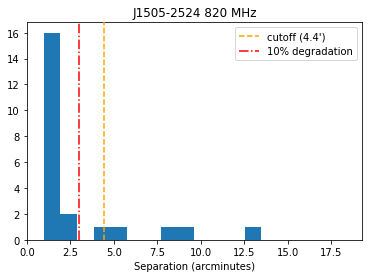

  19 time(s) at 820 MHz within 4.4 arcmin of the timing position (23 total)
  Min separation at 820 MHz: 1.1 arcmin (deg = 0.99)
  Med separation at 820 MHz: 1.4 arcmin (deg = 0.98)
  Max separation at 820 MHz: 12.9 arcmin (deg = 0.13)
  Max separation at 820 MHz: 12.9 arcmin (deg = 0.13)
  Degradation factor at 820 MHz: 0.96
PSR J1530-2114 was observed 32 times


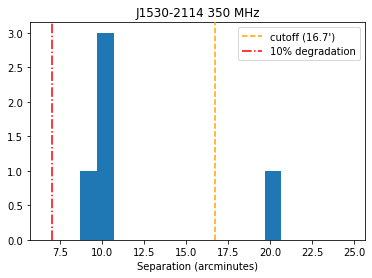

  4 time(s) at 350 MHz within 16.7 arcmin of the timing position (5 total)
  Min separation at 350 MHz: 9.7 arcmin (deg = 0.81)
  Med separation at 350 MHz: 9.7 arcmin (deg = 0.81)
  Max separation at 350 MHz: 20.6 arcmin (deg = 0.39)
  Max separation at 350 MHz: 20.6 arcmin (deg = 0.39)
  Degradation factor at 350 MHz: 0.81


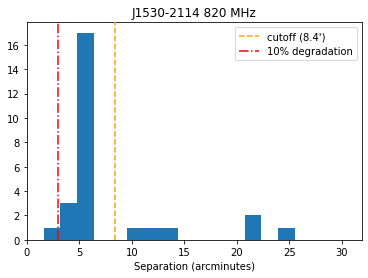

  21 time(s) at 820 MHz within 8.4 arcmin of the timing position (27 total)
  Min separation at 820 MHz: 3.1 arcmin (deg = 0.89)
  Med separation at 820 MHz: 5.4 arcmin (deg = 0.71)
  Max separation at 820 MHz: 25.1 arcmin (deg = 0.00)
  Max separation at 820 MHz: 25.1 arcmin (deg = 0.00)
  Degradation factor at 820 MHz: 0.74
PSR J1816+4510 was observed 93 times


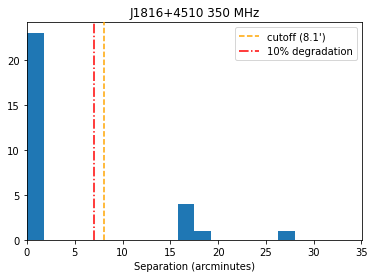

  23 time(s) at 350 MHz within 8.1 arcmin of the timing position (29 total)
  Min separation at 350 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 350 MHz: 1.1 arcmin (deg = 1.00)
  Max separation at 350 MHz: 26.6 arcmin (deg = 0.21)
  Max separation at 350 MHz: 26.6 arcmin (deg = 0.21)
  Degradation factor at 350 MHz: 1.00


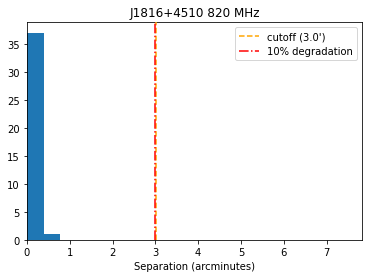

  38 time(s) at 820 MHz within 3.0 arcmin of the timing position (38 total)
  Min separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 820 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.4 arcmin (deg = 1.00)
  Max separation at 820 MHz: 0.4 arcmin (deg = 1.00)
  Degradation factor at 820 MHz: 1.00


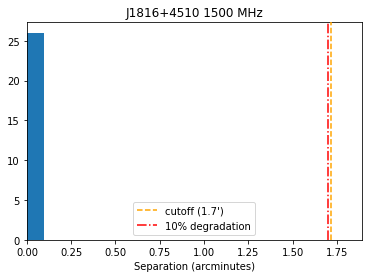

  26 time(s) at 1500 MHz within 1.7 arcmin of the timing position (26 total)
  Min separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Med separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Max separation at 1500 MHz: 0.0 arcmin (deg = 1.00)
  Degradation factor at 1500 MHz: 1.00
PSR J1913+3732 was observed 28 times


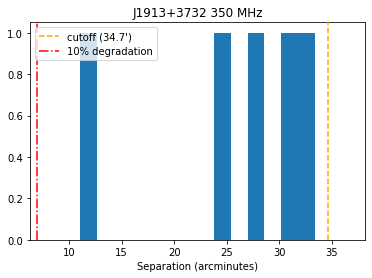

  5 time(s) at 350 MHz within 34.7 arcmin of the timing position (5 total)
  Min separation at 350 MHz: 11.7 arcmin (deg = 0.74)
  Med separation at 350 MHz: 27.7 arcmin (deg = 0.18)
  Max separation at 350 MHz: 32.2 arcmin (deg = 0.10)
  Max separation at 350 MHz: 32.2 arcmin (deg = 0.10)
  Degradation factor at 350 MHz: 0.28


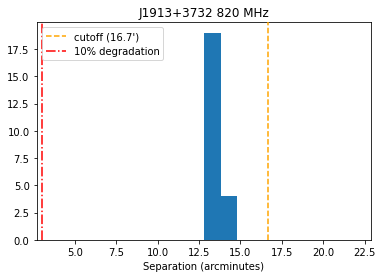

  23 time(s) at 820 MHz within 16.7 arcmin of the timing position (23 total)
  Min separation at 820 MHz: 13.1 arcmin (deg = 0.12)
  Med separation at 820 MHz: 13.7 arcmin (deg = 0.10)
  Max separation at 820 MHz: 14.1 arcmin (deg = 0.09)
  Max separation at 820 MHz: 14.1 arcmin (deg = 0.09)
  Degradation factor at 820 MHz: 0.10
PSR J1929+6630 was observed 22 times


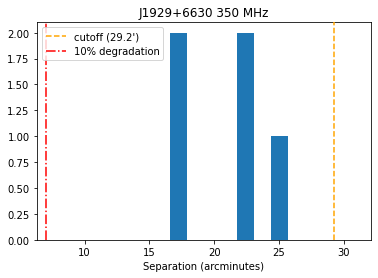

  5 time(s) at 350 MHz within 29.2 arcmin of the timing position (5 total)
  Min separation at 350 MHz: 17.8 arcmin (deg = 0.49)
  Med separation at 350 MHz: 22.2 arcmin (deg = 0.33)
  Max separation at 350 MHz: 25.4 arcmin (deg = 0.24)
  Max separation at 350 MHz: 25.4 arcmin (deg = 0.24)
  Degradation factor at 350 MHz: 0.39


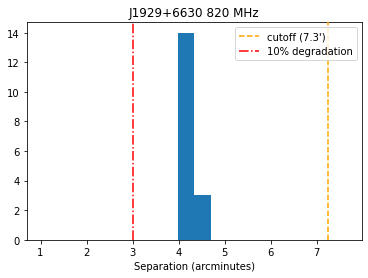

  17 time(s) at 820 MHz within 7.3 arcmin of the timing position (17 total)
  Min separation at 820 MHz: 4.1 arcmin (deg = 0.82)
  Med separation at 820 MHz: 4.3 arcmin (deg = 0.80)
  Max separation at 820 MHz: 4.5 arcmin (deg = 0.78)
  Max separation at 820 MHz: 4.5 arcmin (deg = 0.78)
  Degradation factor at 820 MHz: 0.80
PSR J1930+6205 was observed 20 times


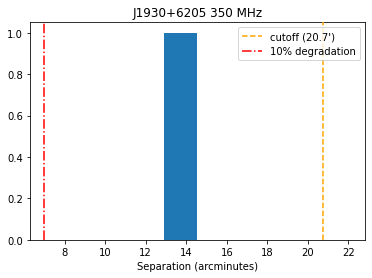

  2 time(s) at 350 MHz within 20.7 arcmin of the timing position (2 total)
  Min separation at 350 MHz: 13.1 arcmin (deg = 0.68)
  Med separation at 350 MHz: 13.7 arcmin (deg = 0.66)
  Max separation at 350 MHz: 14.4 arcmin (deg = 0.63)
  Max separation at 350 MHz: 14.4 arcmin (deg = 0.63)
  Degradation factor at 350 MHz: 0.66


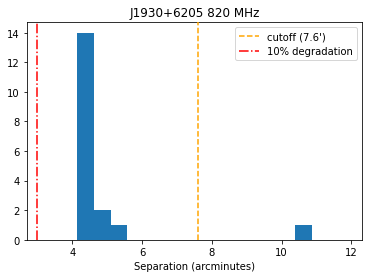

  17 time(s) at 820 MHz within 7.6 arcmin of the timing position (18 total)
  Min separation at 820 MHz: 4.6 arcmin (deg = 0.77)
  Med separation at 820 MHz: 4.6 arcmin (deg = 0.77)
  Max separation at 820 MHz: 10.6 arcmin (deg = 0.26)
  Max separation at 820 MHz: 10.6 arcmin (deg = 0.26)
  Degradation factor at 820 MHz: 0.77
PSR J2104+2830 was observed 21 times


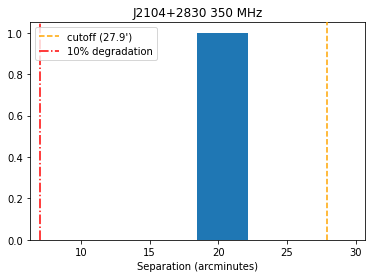

  3 time(s) at 350 MHz within 27.9 arcmin of the timing position (3 total)
  Min separation at 350 MHz: 18.6 arcmin (deg = 0.46)
  Med separation at 350 MHz: 20.9 arcmin (deg = 0.38)
  Max separation at 350 MHz: 21.8 arcmin (deg = 0.35)
  Max separation at 350 MHz: 21.8 arcmin (deg = 0.35)
  Degradation factor at 350 MHz: 0.40


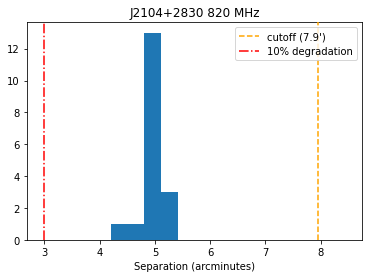

  18 time(s) at 820 MHz within 7.9 arcmin of the timing position (18 total)
  Min separation at 820 MHz: 4.5 arcmin (deg = 0.78)
  Med separation at 820 MHz: 4.9 arcmin (deg = 0.74)
  Max separation at 820 MHz: 5.4 arcmin (deg = 0.70)
  Max separation at 820 MHz: 5.4 arcmin (deg = 0.70)
  Degradation factor at 820 MHz: 0.74
PSR J2115+6702 was observed 16 times
  1 time(s) at 350 MHz within 8.7 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 8.6 arcmin (deg = 0.85)
  Med separation at 350 MHz: 8.6 arcmin (deg = 0.85)
  Max separation at 350 MHz: 8.6 arcmin (deg = 0.85)
  Max separation at 350 MHz: 8.6 arcmin (deg = 0.85)
  Degradation factor at 350 MHz: 0.85


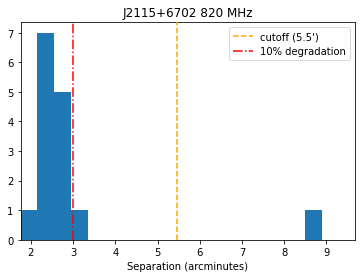

  14 time(s) at 820 MHz within 5.5 arcmin of the timing position (15 total)
  Min separation at 820 MHz: 2.2 arcmin (deg = 0.95)
  Med separation at 820 MHz: 2.5 arcmin (deg = 0.93)
  Max separation at 820 MHz: 8.6 arcmin (deg = 0.40)
  Max separation at 820 MHz: 8.6 arcmin (deg = 0.40)
  Degradation factor at 820 MHz: 0.92
PSR J2145+2158 was observed 19 times
  1 time(s) at 350 MHz within 15.5 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 15.4 arcmin (deg = 0.59)
  Med separation at 350 MHz: 15.4 arcmin (deg = 0.59)
  Max separation at 350 MHz: 15.4 arcmin (deg = 0.59)
  Max separation at 350 MHz: 15.4 arcmin (deg = 0.59)
  Degradation factor at 350 MHz: 0.59


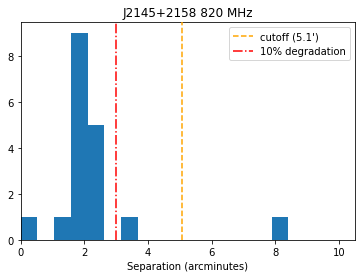

  17 time(s) at 820 MHz within 5.1 arcmin of the timing position (18 total)
  Min separation at 820 MHz: 0.3 arcmin (deg = 1.00)
  Med separation at 820 MHz: 2.1 arcmin (deg = 0.95)
  Max separation at 820 MHz: 8.2 arcmin (deg = 0.44)
  Max separation at 820 MHz: 8.2 arcmin (deg = 0.44)
  Degradation factor at 820 MHz: 0.95
PSR J2210+5712 was observed 21 times
  1 time(s) at 350 MHz within 17.7 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 17.6 arcmin (deg = 0.50)
  Med separation at 350 MHz: 17.6 arcmin (deg = 0.50)
  Max separation at 350 MHz: 17.6 arcmin (deg = 0.50)
  Max separation at 350 MHz: 17.6 arcmin (deg = 0.50)
  Degradation factor at 350 MHz: 0.50


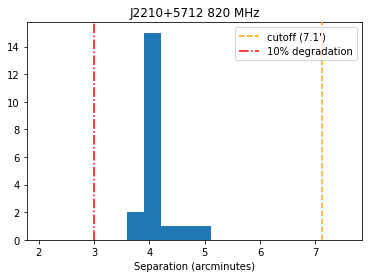

  20 time(s) at 820 MHz within 7.1 arcmin of the timing position (20 total)
  Min separation at 820 MHz: 3.7 arcmin (deg = 0.85)
  Med separation at 820 MHz: 4.1 arcmin (deg = 0.81)
  Max separation at 820 MHz: 4.9 arcmin (deg = 0.75)
  Max separation at 820 MHz: 4.9 arcmin (deg = 0.75)
  Degradation factor at 820 MHz: 0.81
PSR J2326+6243 was observed 22 times
  1 time(s) at 350 MHz within 6.4 arcmin of the timing position (1 total)
  Min separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Med separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Max separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Max separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Degradation factor at 350 MHz: 0.91


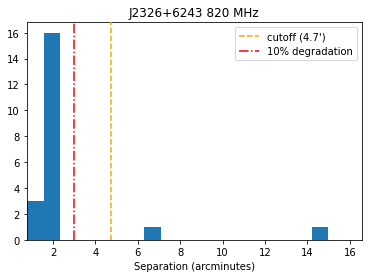

  19 time(s) at 820 MHz within 4.7 arcmin of the timing position (21 total)
  Min separation at 820 MHz: 1.2 arcmin (deg = 0.98)
  Med separation at 820 MHz: 1.7 arcmin (deg = 0.96)
  Max separation at 820 MHz: 14.8 arcmin (deg = 0.07)
  Max separation at 820 MHz: 14.8 arcmin (deg = 0.07)
  Degradation factor at 820 MHz: 0.97
PSR J2354-2250 was observed 22 times


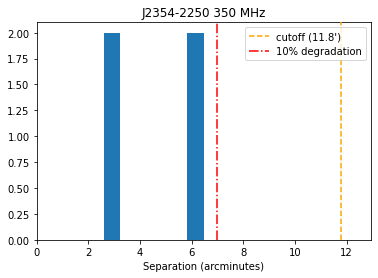

  4 time(s) at 350 MHz within 11.8 arcmin of the timing position (4 total)
  Min separation at 350 MHz: 3.2 arcmin (deg = 0.98)
  Med separation at 350 MHz: 4.8 arcmin (deg = 0.95)
  Max separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Max separation at 350 MHz: 6.3 arcmin (deg = 0.91)
  Degradation factor at 350 MHz: 0.95


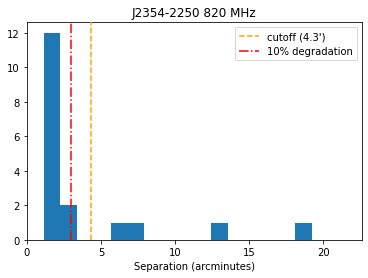

  14 time(s) at 820 MHz within 4.3 arcmin of the timing position (18 total)
  Min separation at 820 MHz: 1.1 arcmin (deg = 0.98)
  Med separation at 820 MHz: 1.3 arcmin (deg = 0.98)
  Max separation at 820 MHz: 19.1 arcmin (deg = 0.01)
  Max separation at 820 MHz: 19.1 arcmin (deg = 0.01)
  Degradation factor at 820 MHz: 0.96


In [49]:
data_dir = "./"
deg_factors = []
psrsfreqs = []
pars = sorted(glob.glob(f"{data_dir}*fiore+23.par"))

lengths_file = open("lengths.txt","w")

PRINT_FILES = False

for p in pars:
    par_path = os.path.join(data_dir, p)
        
    # For each scan, get the RA/Dec and compare to timing position (eqcoord) 
    with open(p, 'r') as infile:
        for l in infile.readlines():
            if l.startswith("PSRJ"):
                psr = l.split()[1]
            elif l.startswith("RAJ"):
                ra_str = l.split()[1]
            elif l.startswith("DECJ"):
                dec_str = l.split()[1].strip("+")
            else:
                pass
    
    eqcoord = SkyCoord(ra_str,dec_str,frame=ICRS,unit=(u.hourangle, u.deg))
    
    mlfrd_path = os.path.join(data_dir,f"{psr}.mlfrd")
    
    # mfrd files contain MJD, length, center frequency, RA, Dec info for each scan for a given pulsar
    with open(mlfrd_path) as f:
        mlfrd_lines = f.readlines()
    
    fnames = []
    freqs = []
    obstime = 0
    separations = [] # gather angular separations (arcmins)
    degradations = [] # and calculate degradations based on telescope
    lengths = [] # used to weight degradation factor later
    for ml in mlfrd_lines:
        if ml.startswith(('GUPPI', 'guppi', 'VEGAS')):
            fname, mjd_str, len_str, freq_str, ra_str, dec_str = ml.strip().split()
            c = SkyCoord(ra_str, dec_str, frame='icrs', unit=(u.hourangle, u.deg))
            fnames.append(fname)
            freq = float(freq_str)
            sep = eqcoord.separation(c).arcminute
            deg = deg_GBT(sep*u.arcmin,freq*MHz)
            freqs.append(freq)
            lengths.append(float(len_str))
            separations.append(sep)
            degradations.append(deg)
            obstime += float(len_str)
        elif ml.startswith(('puppi')):
            fname, mjd_str, len_str, freq_str, ra_str, dec_str = ml.strip().split()
            c = SkyCoord(ra_str, dec_str, frame='icrs', unit=(u.hourangle, u.deg))
            fnames.append(fname)
            freq = float(freq_str)
            sep = eqcoord.separation(c).arcminute
            deg = deg_AO(sep*u.arcmin,freq*MHz)
            freqs.append(freq)
            lengths.append(float(len_str))
            separations.append(sep)
            degradations.append(deg)
            obstime += float(len_str)
        elif ml.startswith(('J1327')):
            fname, mjd_str, len_str, freq_str, ra_str, dec_str = ml.strip().split()
            c = SkyCoord(ra_str, dec_str, frame='icrs', unit=(u.hourangle, u.deg))
            fnames.append(fname)
            freq = float(freq_str)
            sep = eqcoord.separation(c).arcminute
            deg = deg_LWA1(sep*u.arcmin)
            freqs.append(freq)
            lengths.append(float(len_str))
            separations.append(sep)
            degradations.append(deg)
            obstime += float(len_str)
        elif ml.startswith(('J0215')):
            fname, mjd_str, len_str, freq_str, ra_str, dec_str = ml.strip().split()
            c = SkyCoord(ra_str, dec_str, frame='icrs', unit=(u.hourangle, u.deg))
            fnames.append(fname)
            freq = float(freq_str)
            sep = eqcoord.separation(c).arcminute
            deg = deg_LOFAR(sep*u.arcmin)
            freqs.append(freq)
            lengths.append(float(len_str))
            separations.append(sep)
            degradations.append(deg)
            obstime += float(len_str)
    
    # Closer look at separations
    lengths = np.array(lengths)
    separations = np.array(separations)
    degradations = np.array(degradations)
    n2000,n1500,n1430,n1380,n820,n430,n350,n149,n72,n57,n42 = freqs.count(2000.0),freqs.count(1500.0),freqs.count(1430.0),freqs.count(1380.0),freqs.count(820.0),freqs.count(430.0),freqs.count(350.0),freqs.count(148.926),freqs.count(71.85),freqs.count(57.15),freqs.count(42.45)
    nother = len(freqs) - (n42+n57+n72+n149+n350+n430+n820+n1380+n1430+n1500+n2000)
    print(f"PSR {psr} was observed {len(separations)} times")

    for ff in [42.45,57.15,71.85,148.926,350.0,430.0,820.0,1380.0,1430.0,1500.0,2000.0]:
        i_freq = np.where(np.array(freqs) == ff)[0]
        # separation thresholds (st) chosen to limit degradation to 10% when possible
        if ff == 42.45:
            deg90 = 56.8 # arcmin
            nt = n42
        elif ff == 57.15:
            deg90 = 42.2
            nt = n57
        elif ff == 71.85:
            deg90 = 33.5
            nt = n72
        elif ff == 148.926:
            deg90 = 15.0
            nt = n149
        elif ff == 350:
            deg90 = 7.0
            nt = n350
        elif ff == 430.0:
            deg90 = 5.7
            nt = n430
        elif ff == 820.0:
            deg90 = 3.0
            nt = n820
        elif ff == 1380.0:
            deg90 = 1.7
            nt = n1380
        elif ff == 1430.0:
            deg90 = 1.7
            nt = n1430
        elif ff == 1500.0:
            deg90 = 1.7
            nt = n1500
        elif ff == 2000.0:
            deg90 = 1.3
            nt = n2000
        
        nws=0
        if separations[i_freq].any():
            if len(separations[i_freq]) > 1:
                st = np.median(separations[i_freq]) + deg90
                plt.title(f"{psr} {int(ff)} MHz")
                xmin = min(max(0.0,0.9*min(separations[i_freq]) - std),0.9*deg90)
                xmax = max(1.1*max(separations[i_freq]) + std, 1.1*st)
                plt.hist(separations[i_freq],bins=20,range=(xmin,xmax))
                plt.axvline(st,linestyle="--",label=f"cutoff ({st:.1f}')",c='orange',zorder=4)
                plt.axvline(deg90,linestyle="-.",label="10% degradation",c='r',zorder=4)
                std = np.std(separations[i_freq])
                plt.xlim(xmin, xmax)
                plt.xlabel("Separation (arcminutes)")
                plt.legend()
                plt.show()
            else:
                st = separations[i_freq][0]+0.1
            nws = len(np.where(separations[i_freq]<st)[0]) # number within separation threshold
                
            print(
            f"  {nws} time(s) at {ff:.0f} MHz within {st:.1f} arcmin of the timing position ({nt} total)"
            )
            minsep = np.min(separations[i_freq])
            maxsep = np.max(separations[i_freq])
            medsep = np.median(separations[i_freq])
            
            freq_cut = [(f==ff) for f in freqs]
            seps_cut = (separations < st)
            weights = lengths[freq_cut*seps_cut]
            
            lengths_file.write(f"{psr} {ff} {np.sum(lengths[freq_cut*seps_cut])}\n")
            
            if ff < 100.0:
                mindeg = deg_LWA1(minsep*u.arcmin)
                maxdeg = deg_LWA1(maxsep*u.arcmin)
                meddeg = deg_LWA1(medsep*u.arcmin)
                degs   = deg_LWA1(separations[freq_cut*seps_cut]*u.arcmin)
            elif ff == 148.926:
                mindeg = deg_LOFAR(minsep*u.arcmin)
                maxdeg = deg_LOFAR(maxsep*u.arcmin)
                meddeg = deg_LOFAR(medsep*u.arcmin)
                degs   = deg_LOFAR(separations[freq_cut*seps_cut]*u.arcmin)
            elif ff == 327.0 or ff == 430.0 or 1000. < ff < 1450.0:
                mindeg = deg_AO(minsep*u.arcmin,ff*MHz)
                maxdeg = deg_AO(maxsep*u.arcmin,ff*MHz)
                meddeg = deg_AO(medsep*u.arcmin,ff*MHz)
                degs   = deg_AO(separations[freq_cut*seps_cut]*u.arcmin,ff*MHz)
            else:
                mindeg = deg_GBT(minsep*u.arcmin,ff*MHz)
                maxdeg = deg_GBT(maxsep*u.arcmin,ff*MHz)
                meddeg = deg_GBT(medsep*u.arcmin,ff*MHz)
                degs   = deg_GBT(separations[freq_cut*seps_cut]*u.arcmin,ff*MHz)
            
            deg_final = np.average(degs,weights=np.sqrt(weights)) # degradation of accepted files, weighted by sqrt(tobs)
            
            freq=int(round(ff,0))
            if ff==42.45 or ff==71.85 or ff==1430:
                pass
            else:
                psrsfreqs.append(f"{psr}   {freq}")
                deg_factors.append(deg_final)
            
            print(f"  Min separation at {ff:.0f} MHz: {minsep:.1f} arcmin (deg = {mindeg:0.2f})")
            print(f"  Med separation at {ff:.0f} MHz: {medsep:.1f} arcmin (deg = {meddeg:0.2f})")
            print(f"  Max separation at {ff:.0f} MHz: {maxsep:.1f} arcmin (deg = {maxdeg:0.2f})")
            print(f"  Max separation at {ff:.0f} MHz: {maxsep:.1f} arcmin (deg = {maxdeg:0.2f})")
            print(f"  Degradation factor at {ff:.0f} MHz: {deg_final:.2f}")
        else:
            if ff == 350.0 or ff == 820.0:
                print(f"  (No detections at {ff:.0f} MHz)")
            
        if PRINT_FILES:
            sum_fname = f"{psr}_{int(ff)}.files"
            #print(np.array(fnames)[freq_cut*seps_cut])
            if nws != nt:
                with open(sum_fname,'w') as f:
                    for file in np.array(fnames)[freq_cut*seps_cut]:
                        f.write(file+'\n')
    #print(f"  PSR {psr} has {nother} observations at unaccounted-for frequencies")
lengths_file.close()
if PRINT_FILES and len(psrsfreqs)==len(deg_factors):
    fname = "deg_factors.dat"
    with open(fname, 'w') as f:
        f.write("   PSR      FREQ (MHz)   DEG\n")
        for psrfreq,df in zip(psrsfreqs,deg_factors):
            psr = psrfreq.split()[0]
            freq = psrfreq.split()[1]
            if freq == "57":
                freq = "57.15"
            f.write(f"{psr}     {freq}      {float(df):.2f}\n")

In [ ]:
J0957_ra  = "09:57:08.1229793"
J0957_dec = "-06:19:37.50795"
J0957_pos = SkyCoord(J0957_ra,J0957_dec,frame=ICRS,unit=(u.hourangle, u.deg))

In [74]:
ras = ["09:55:07.848",
       "09:57:52.176",
       "09:56:10.176",
       "09:58:57.456",
       "09:54:28.920",
       "09:57:10.944",
       "09:59:56.976",
       "09:55:29.976",
       "09:58:16.872"]
decs = ["-05:28:07.320",
        "-05:39:08.280",
        "-05:56:08.880",
        "-06:05:03.120",
        "-06:13:40.800",
        "-06:23:32.280",
        "-06:34:32.160",
        "-06:41:43.440",
        "-06:51:40.680"]

In [82]:
for r,d in zip(ras, decs):
    pointing = SkyCoord(r,d,frame=ICRS,unit=(u.hourangle, u.deg))
    sep = pointing.separation(J0957_pos).to(u.arcmin)
    deg = deg_GBT(sep,350*u.MHz)
    print(pointing.ra.hms,pointing.dec,sep.value,deg)

hms_tuple(h=9.0, m=55.0, s=7.847999999994926) -5d28m07.32s 59.557856201003815 0.0003794580306933756
hms_tuple(h=9.0, m=57.0, s=52.176000000006724) -5d39m08.28s 41.94255033318454 0.020112267008510362
hms_tuple(h=9.0, m=56.0, s=10.176000000003569) -5d56m08.88s 27.5435377680924 0.18550962404225455
hms_tuple(h=9.0, m=58.0, s=57.45600000000593) -6d05m03.12s 30.83426473383106 0.12108804885714836
hms_tuple(h=9.0, m=54.0, s=28.92000000000209) -6d13m40.8s 40.00629152388854 0.02860785693119088
hms_tuple(h=9.0, m=57.0, s=10.943999999998795) -6d23m32.28s 3.9751495560854453 0.9655190275878642
hms_tuple(h=9.0, m=59.0, s=56.975999999999374) -6d34m32.16s 44.517335466564326 0.012267950399368002
hms_tuple(h=9.0, m=55.0, s=29.975999999999203) -6d41m43.44s 32.90391709119615 0.09034050121228483
hms_tuple(h=9.0, m=58.0, s=16.871999999999048) -6d51m40.68s 36.3165288250481 0.05346518822501614


In [22]:
deg_GBT(0.1*u.arcsec,2000*MHz)

<Quantity 0.9999998>